# SENTIMENT ANALYSIS OF FINANCIAL NEWS
#### 2 DATASETS: news and tweets
Both datasets have already been filtered and structured into two different dataframes

Structure of this notebook:
- data cleaning
- data exploration
  - LDA model (generic)

In [77]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth',None)

In [78]:
news=pd.read_csv('TUTTE_NEWS.csv')
tweets=pd.read_csv('tweets/TUTTI_TWEETS_raw.csv')

In [79]:
news

,date,headline,stock
0,2020-07-17,"Jim Cramer: A better way to invest in the Covid-19 vaccine gold rush. ""Mad Money"" host Jim Cramer recommended buying four companies that are supporting vaccine developers.",NaN
1,2020-07-17,"Cramer's lightning round: I would own Teradyne. ""Mad Money"" host Jim Cramer rings the lightning round bell, which means he's giving his answers to callers' stock questions at rapid speed.",NaN
2,2020-07-17,"Cramer's week ahead: Big week for earnings, even bigger week for vaccines. ""We'll pay more for the earnings of the non-Covid companies if The Lancet publishes some good news from AstraZeneca's vaccine trial,"" Cramer said.",NaN
3,2020-07-17,"IQ Capital CEO Keith Bliss says tech and healthcare will rally. Keith Bliss, IQ Capital CEO, joins ""Closing Bell"" to talk about the broader markets, including the performance of the S&P 500 and the Nasdaq.",NaN
4,2020-07-16,"Wall Street delivered the 'kind of pullback I've been waiting for,' Jim Cramer says. ""Look for the stocks of high-quality companies that are going lower even though they deserve to go higher,"" the ""Mad Money"" host advised.",NaN
...,...,...,...
124293,2020-07-09,ChemoCentryx files U.S. avacopan application for blood vessel inflammation,$CCXI
124294,2020-07-09,KLA downgraded as valuation limits upside potential,$KLAC $KLAC $AMAT
124295,2020-07-09,ChromaDex reports promising anti-viral effects of Niagen in coronavirus cell model,$CDXC
124296,2020-07-09,Sandvik acquires remaining stake in Allied Construction,$SDVKY $SDVKF


In [80]:
tweets

,date,username,text
0,2020-01-31,Iamanirudhsethi,"S&amp;P 500 March 6, 2009 low: 666.79\nS&amp;P 500 ATH January 22, 2020: 3,337.77\n\n666 x 5 = 3,330\n\n666 = Mark Haines bottom\n3337 = Corona Virus Top\n\n#SPX500\n@prrobbins @BrainandMoney @1shankarsharma @russian_market @TrueCrypto28 @EddyElfenbein @TraderBolsa @modern_rock @SJosephBurns https://t.co/fM8N2lI5uV"
1,2020-01-31,TOPANDBTMDALE,"$100.00 to $13,218.75 possible in one https://t.co/Zuoa00Ch0v trade SPY options. - #SPX500 chart https://t.co/0VuMgCXnLE"
2,2020-01-31,Iamanirudhsethi,#SPX500\nWe see 3204---------3187 soon very soon !!!\nMore to our Members https://t.co/qaRgdnH3gf
3,2020-01-31,BrixInvest,#LEGO #LEGOWestern #LEGOWildWest #LEGOSystem See the top best performing or sought after LEGO western sets #AFOL #LEGObricks #Toys #SP500 #stocks #legoresaleprices #LEGOblocks #top10best #top10LEGO https://t.co/1mMAIY2UML
4,2020-01-31,ResearchQf,"1) I've been discussing Nasdaq breadth last few weeks due to its pretty unusual behavior. Today, the 10D average of Nasdaq Adv-Dec closed at -662. Which happens, since there have been plenty of significant corrections and bear markets over ...\n#SPX #NDX\nhttps://t.co/HKE3NhCD1x https://t.co/2uwF9xocHa"
...,...,...,...
92427,2020-08-01,Billions777888,#BTC #Bitcoin $LINK This is sooooo PERFECT\n\n#Coinbase #Binance #Crypto #Gold #GLD #Silver #SLV #OOTT #DJIA #SPY #SPX #QQQ #Bitmex #ETH #GBTC #LINK https://t.co/OzqFuwj5LP
92428,2020-08-01,BrixInvest,"#LEGO #LEGOTechnic #LEGOVehicles set 42000 - Racer, 2013 Release #LEGOPowerFunctions #LEGO2in1 #AFOL #LEGObricks #CollectibleToys #Toys #SP500 #stocks #legoresaleprices #LEGOblocks #top10LEGO #searchengine https://t.co/qFDme5plyD"
92429,2020-08-01,CryptoStefTA,2&gt;1 #SPX this is a buy for me on #SPX/BTC https://t.co/zoZdmEeUEB
92430,2020-08-01,BrixInvest,"#LEGO #LEGOTechnic #LEGOVehicles set 41999 - 4x4 Crawler Exclusive Edition, 2013 Release #LEGOPowerFunctions #LEGO2in1 #AFOL #LEGObricks #CollectibleToys #Toys #SP500 #stocks #legoresaleprices #LEGOblocks #top10LEGO #searchengine https://t.co/GvEEdBfz3v"


#### DATA CLEANING FOR 'tweets' dataset

In [81]:
# Remove emails and newline characters from tweets.text

In [82]:
# Convert to list
data = tweets.text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove links
data = [re.sub(r'https?:\/\/.*[.html]*', '', sent, flags=re.MULTILINE) for sent in data]
data = [re.sub(r'http?:\/\/.*[.html]*', '', sent, flags=re.MULTILINE) for sent in data]


# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'"," ", sent) for sent in data]

data = [re.sub("\."," ", sent) for sent in data]

# remove code between tags {noformat}
data = [re.sub(r'{noformat}.*[{noformat}]*', '', sent) for sent in data]

data = [sent.lower() for sent in data]
data = [re.sub("-"," ", sent) for sent in data]

tweets.text = data

In [83]:
#remove emoji
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

tweets.text = tweets.text.apply(remove_emojis)

In [84]:
#remove @users
tweets.text = [re.sub("@[A-Za-z0-9_]+","", sent) for sent in tweets.text]

In [85]:
#remove $word
#tweets.text = [re.sub(r"\$[A-Za-z0-9_]","", str(sent)) for sent in tweets.text]

In [86]:
#remove numbers - removes pure int but not percentages eg. 5% or 10,000
tweets.text = [re.sub("^\d+\s|\s\d+\s|\s\d+$", "", s) for s in tweets.text]

In [87]:
#remove '&amp'
tweets.text = [re.sub('&amp', '&', sent) for sent in tweets.text]

In [88]:
#remove meaningless words
#tweets.text = [re.sub('py', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('ix', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('wm', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('old', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('jia', '', sent) for sent in tweets.text]
tweets.text = [re.sub('s1=', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('xx', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('lt', '', sent) for sent in tweets.text]
tweets.text = [re.sub('s3=', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('#', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('qq', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('vix', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('vxy', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('s_f', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('px', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('dx', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('gmt | all pairs', '', sent) for sent in tweets.text]

In [89]:
#remove | char
tweets.text = [re.sub('\|', '', sent) for sent in tweets.text]
tweets.text

0                                                                                                                                                                               s&;pmarch 6,low:79 s&;path january 22, 2020: 3,337666 x= 3,330= mark haines bottom= corona virus top #spx500 
1                                                                                                                                                                                                                                                              $100to $13,218possible in one 
2                                                                                                                                                                                                                                #spx500 we see       soon very soon !!! more to our members 
3                                                                                      #lego #legowestern #legowildwest #legosystem see the to

In [90]:
#remove all parenthesis
tweets.text = [re.sub(r'[()]', '', sent) for sent in tweets.text]

In [91]:
#remove arabic
tweets.text = [re.sub(r'[\u0621-\u064a\ufb50-\ufdff\ufe70-\ufefc]','',sent) for sent in tweets.text]

In [92]:
#remove this useless username text
tweets = tweets[tweets.username != 'howrealisreal']
tweets = tweets[tweets.username != 'chartandlong']
tweets = tweets[tweets.username != 'gate_io']

In [93]:
a= tweets[tweets.username == 'PeterLBrandt'].text
a

25194    short term bottom in play $spy $es_f #spx500 
Name: text, dtype: object

In [94]:
tweets['text'] = tweets['text'].astype(str)

In [95]:
tweets.drop([74424 , 74480]) #drop 2 specific rows coz thery are in spanish - no meaning

,date,username,text
0,2020-01-31,Iamanirudhsethi,"s&;pmarch 6,low:79 s&;path january 22, 2020: 3,337666 x= 3,330= mark haines bottom= corona virus top #spx500"
1,2020-01-31,TOPANDBTMDALE,"$100to $13,218possible in one"
2,2020-01-31,Iamanirudhsethi,#spx500 we see soon very soon !!! more to our members
3,2020-01-31,BrixInvest,#lego #legowestern #legowildwest #legosystem see the top best performing or sought after lego western sets #afol #legobricks #toys #sp500 #stocks #legoresaleprices #legoblocks #top10best #top10lego
4,2020-01-31,ResearchQf,"1 i ve been discussing nasdaq breadth last few weeks due to its pretty unusual behavior today, the 10d average of nasdaq adv dec closed at which happens, since there have been plenty of significant corrections and bear markets over #spx #ndx"
...,...,...,...
92427,2020-08-01,Billions777888,#btc #bitcoin $link this is sooooo perfect #coinbase #binance #crypto #gold #gld #silver #slv #oott #djia #spy #spx #qqq #bitmex #eth #gbtc #link
92428,2020-08-01,BrixInvest,"#lego #legotechnic #legovehicles set racer,release #legopowerfunctions #lego2in1 #afol #legobricks #collectibletoys #toys #sp500 #stocks #legoresaleprices #legoblocks #top10lego #searchengine"
92429,2020-08-01,CryptoStefTA,2&gt;1 #spx this is a buy for me on #spx/btc
92430,2020-08-01,BrixInvest,"#lego #legotechnic #legovehicles set 4x4 crawler exclusive edition,release #legopowerfunctions #lego2in1 #afol #legobricks #collectibletoys #toys #sp500 #stocks #legoresaleprices #legoblocks #top10lego #searchengine"


In [96]:
tweets = tweets[tweets.username != 'AbstractCapita1']
tweets = tweets[tweets.username != 'yismary']

In [97]:
#convert all dates in datetime format so that i can extract the month
tweets.date = pd.to_datetime(tweets.date, format='%Y-%m-%d')

In [98]:
#save data
tweets.to_csv( "TUTTI_TWEETS_clean.csv", index=False, encoding='utf-8-sig')

In [99]:
tweets

,date,username,text
0,2020-01-31,Iamanirudhsethi,"s&;pmarch 6,low:79 s&;path january 22, 2020: 3,337666 x= 3,330= mark haines bottom= corona virus top #spx500"
1,2020-01-31,TOPANDBTMDALE,"$100to $13,218possible in one"
2,2020-01-31,Iamanirudhsethi,#spx500 we see soon very soon !!! more to our members
3,2020-01-31,BrixInvest,#lego #legowestern #legowildwest #legosystem see the top best performing or sought after lego western sets #afol #legobricks #toys #sp500 #stocks #legoresaleprices #legoblocks #top10best #top10lego
4,2020-01-31,ResearchQf,"1 i ve been discussing nasdaq breadth last few weeks due to its pretty unusual behavior today, the 10d average of nasdaq adv dec closed at which happens, since there have been plenty of significant corrections and bear markets over #spx #ndx"
...,...,...,...
92427,2020-08-01,Billions777888,#btc #bitcoin $link this is sooooo perfect #coinbase #binance #crypto #gold #gld #silver #slv #oott #djia #spy #spx #qqq #bitmex #eth #gbtc #link
92428,2020-08-01,BrixInvest,"#lego #legotechnic #legovehicles set racer,release #legopowerfunctions #lego2in1 #afol #legobricks #collectibletoys #toys #sp500 #stocks #legoresaleprices #legoblocks #top10lego #searchengine"
92429,2020-08-01,CryptoStefTA,2&gt;1 #spx this is a buy for me on #spx/btc
92430,2020-08-01,BrixInvest,"#lego #legotechnic #legovehicles set 4x4 crawler exclusive edition,release #legopowerfunctions #lego2in1 #afol #legobricks #collectibletoys #toys #sp500 #stocks #legoresaleprices #legoblocks #top10lego #searchengine"


#### DATA EXPLORATION 
Topic/Keyword extraction - WordCloud Visualization etc.

In [101]:
import nltk; 

In [102]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\Giulia\Anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [103]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'java', 'org', 'apache'])

In [104]:
tweets=pd.read_csv('TUTTI_TWEETS_clean.csv')

## LDA topic model is used for topic/keyword extraction

### Tokenize words and Clean-up text
The sentences look better now, but I want to tokenize each sentence into a list of words, removing punctuations and unneccessary characters altogether.
GENSIM library is used.

In [105]:
data=tweets.text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence).encode('utf-8'), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
print(data_words[:1])


[['pmarch', 'low', 'path', 'january', 'mark', 'haines', 'bottom', 'corona', 'virus', 'top', 'spx']]


In [106]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['pmarch', 'low', 'path', 'january', 'mark', 'haines', 'bottom', 'corona_virus', 'top', 'spx']


In [107]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [108]:
nlp = spacy.load("en_core_web_sm")

In [109]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [110]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# # Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# print(data_lemmatized[:1])

Create the Dictionary and Corpus needed for Topic Modeling

The two main inputs to the LDA topic model are the dictionary(`id2word`) and the corpus

In [111]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


In [112]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('bottom', 1),
  ('corona_virus', 1),
  ('haines', 1),
  ('january', 1),
  ('low', 1),
  ('mark', 1),
  ('path', 1),
  ('pmarch', 1),
  ('spx', 1),
  ('top', 1)]]

In [113]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [114]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.089*"spx" + 0.034*"spy" + 0.027*"es_f" + 0.022*"sp" + 0.013*"trading" + '
  '0.010*"term" + 0.009*"futures" + 0.009*"short" + 0.009*"high" + 0.009*"es"'),
 (1,
  '0.107*"lego" + 0.089*"top" + 0.056*"stocks" + 0.052*"sp" + '
  '0.047*"afol_legobricks" + 0.041*"collectibletoys_toys" + 0.033*"best" + '
  '0.024*"legoblocks" + 0.023*"instafollow_legoblocks" + 0.020*"searchengine"'),
 (2,
  '0.071*"sp" + 0.051*"nasdaq" + 0.034*"stocks" + 0.026*"stockmarket" + '
  '0.025*"djia" + 0.020*"dow" + 0.019*"investing" + 0.019*"us" + '
  '0.017*"markets" + 0.016*"stock"'),
 (3,
  '0.028*"spx" + 0.028*"gold" + 0.024*"djia" + 0.019*"trading" + 0.019*"oott" '
  '+ 0.018*"forex" + 0.016*"btc" + 0.015*"link" + 0.015*"bitcoin" + '
  '0.014*"dax"')]


In [115]:
pprint(lda_model.show_topics())

[(0,
  '0.089*"spx" + 0.034*"spy" + 0.027*"es_f" + 0.022*"sp" + 0.013*"trading" + '
  '0.010*"term" + 0.009*"futures" + 0.009*"short" + 0.009*"high" + 0.009*"es"'),
 (1,
  '0.107*"lego" + 0.089*"top" + 0.056*"stocks" + 0.052*"sp" + '
  '0.047*"afol_legobricks" + 0.041*"collectibletoys_toys" + 0.033*"best" + '
  '0.024*"legoblocks" + 0.023*"instafollow_legoblocks" + 0.020*"searchengine"'),
 (2,
  '0.071*"sp" + 0.051*"nasdaq" + 0.034*"stocks" + 0.026*"stockmarket" + '
  '0.025*"djia" + 0.020*"dow" + 0.019*"investing" + 0.019*"us" + '
  '0.017*"markets" + 0.016*"stock"'),
 (3,
  '0.028*"spx" + 0.028*"gold" + 0.024*"djia" + 0.019*"trading" + 0.019*"oott" '
  '+ 0.018*"forex" + 0.016*"btc" + 0.015*"link" + 0.015*"bitcoin" + '
  '0.014*"dax"')]


In [116]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric

lda_topics = lda_model.show_topics(num_words=5)

topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]

for topic in lda_topics:
    #print(topic)
    topics.append(preprocess_string(topic[1], filters))

print(topics)

[['spx', 'spy', 'es', 'f', 'sp', 'trading'], ['lego', 'top', 'stocks', 'sp', 'afol', 'legobricks'], ['sp', 'nasdaq', 'stocks', 'stockmarket', 'djia'], ['spx', 'gold', 'djia', 'trading', 'oott']]


In [117]:
result = ','.join([item for sub_list in topics for item in sub_list])
result

'spx,spy,es,f,sp,trading,lego,top,stocks,sp,afol,legobricks,sp,nasdaq,stocks,stockmarket,djia,spx,gold,djia,trading,oott'

In [118]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\Giulia\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.205160  0.261930       1        1  46.929759
2     -0.085201 -0.224986       2        1  26.470041
3      0.217428 -0.153873       3        1  20.151964
1     -0.337388  0.116929       4        1   6.448235, topic_info=           Term          Freq         Total Category  logprob  loglift
23           sp  43997.000000  43997.000000  Default  30.0000  30.0000
24       stocks  16476.000000  16476.000000  Default  29.0000  29.0000
8           spx  62524.000000  62524.000000  Default  28.0000  28.0000
17         lego   9079.000000   9079.000000  Default  27.0000  27.0000
39       nasdaq  17799.000000  17799.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
24       stocks   4768.519317  16476.546870   Topic4  -2.8789   1.5015
23           sp   4428.877743  43997.629828   Topic4  -2.9528   0.4454
45        today    362.238501   7482.083192   Topic4  -5.4564  -0.2866
13          see    335.269474   4747.485117   Topic4  -5.5338   0.0909
374  investment    277.811743   2055.752739   Topic4  -5.7218   0.7399

[199 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
445       4  0.999480              aapl
15        4  0.999684   afol_legobricks
2059      4  0.998986               amd
156       4  0.998707              amzn
5147      4  0.996546  architecture_set
...     ...       ...               ...
148       1  0.860279              week
148       2  0.139589              week
1531      3  0.999699               wti
129       2  0.996896              year
129       4  0.003162              year

[188 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])

### WORDCLOUD VISUALISATION

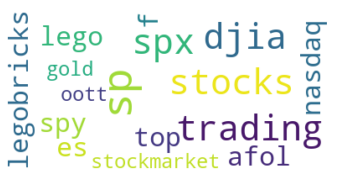

In [120]:
#general wordcloud - tweets
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(result)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("general_cloud.png")

In [122]:
# Start with one review - almonst 10M words!
text = " ".join(review for review in tweets.text)
print ("There are {} words in the combination of all review.".format(len(text)))

TypeError: sequence item 159: expected str instance, float found

In [123]:
from datetime import datetime

In [124]:
#convert all dates in datetime format so that i can extract the month
tweets.date = pd.to_datetime(tweets.date, format='%Y-%m-%d')

### CONSIDER SOME RELEVANT MONTHS - PERIOD OF TIME - GROUP BY

In [125]:
np.unique(tweets.date.dt.month)

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [126]:
monthlynews=tweets.groupby(tweets.date.dt.month)['text'].sum()
monthlynews=pd.DataFrame(monthlynews)

In [127]:
monthlynews.columns

Index(['text'], dtype='object')

In [128]:
#monthlynews.set_index("date", inplace = True)

In [129]:
monthlynews.columns

Index(['text'], dtype='object')

In [130]:
monthlynews.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='date')

In [131]:
monthlynews.to_csv( "TWEETS_MONTH.csv", index=True, encoding='utf-8-sig')

In [400]:
#df.reset_index(drop=True, inplace=True)

In [132]:
#number of news per month
tweets.groupby(tweets.date.dt.month)['text'].count()

date
1     8726
2     8370
3    13807
4    11754
5    14261
6    13386
7    11120
8     9812
Name: text, dtype: int64

In [133]:
monthlynews=pd.read_csv('TWEETS_MONTH.csv')
monthlynews.columns

Index(['date', 'text'], dtype='object')

In [134]:
#uso march text - attenzione agli index!!! partono da 0!!!!! quindi marzo e' 2
march=monthlynews['text'][2]
march

'top semiconductor stocks to watch this week to lead a market rebound go to so far a=c #elliottwaves #es_f #spx #bitcoin s high correlation with the #sp500 isn t over by any stretch, as ourday rolling correlation chart continues to indicate that #crypto markets are fluctuating on a similar path to equities as the #covid19 pandemic continues  what does this mean next for where prices are #cycles $spx #spx500 s&;p   keeping an eye on the daily bar vibration   #gann #sacredgeometry #spx   will it be different this time? place your bets   #spy #qqq #iwm currently what i see on es although that high needs to hold if not will re examine #es_f #elliottwaves #spx #trendisyourfriend short term chart: wilshirefull cap total market price index vs  us gdp us total market capitalization vs  us gdp #marketbreadth #stockmarket #stockmarketnews $spx $spy $es #es_f #sp500 $ivv $voo $es #es_f long term chart: wilshirefull cap total market price index vs  us gdp us total market capitalization vs  us gdp 